In [36]:
# Setup: import libraries
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats

sns.set_theme(style='whitegrid')
# Improve numeric readability globally
from matplotlib.ticker import FuncFormatter

# Currency formatter for PHP with K/M/B suffixes
def php_fmt(x, pos=None):
    try:
        x = float(x)
    except Exception:
        return ''
    ax = abs(x)
    if ax >= 1_000_000_000:
        val = f"{x/1_000_000_000:.1f}B"
    elif ax >= 1_000_000:
        val = f"{x/1_000_000:.1f}M"
    elif ax >= 1_000:
        val = f"{x/1_000:.1f}K"
    else:
        val = f"{x:.0f}"
    return f"₱{val}"

# Pandas display: thousands separators with two decimals
pd.options.display.float_format = lambda v: f"{v:,.2f}"

# Loading Dataset

In [37]:
df = pd.read_csv('dpwh_flood_control_projects.csv')
df
s = df['TypeOfWork'].unique()
s

array(['Construction of Flood Mitigation Structure',
       'Construction of Revetment',
       'Rehabilitation / Major Repair of Drainage Structure',
       'Construction of Slope Protection Structure',
       'Construction of Drainage Structure', 'Construction of Dike',
       'Rehabilitation / Major Repair of Flood Control Structure',
       'Construction of Flood Mitigation Facility',
       'Rehabilitation / Major Repair of Flood Mitigation Facility',
       'Rehabilitation / Major Repair of Slope Protection Structure',
       'Construction of Retarding Basin', 'Construction of Groundsill',
       'Construction of Spur Dike', 'Upgrading of Drainage Structure',
       'Construction of Waterway', 'Construction of Cutoff Channel',
       'Repair/Maintenance of Flood Control Structures', 'Embankment'],
      dtype=object)

# Data Cleaning

In [38]:
# Inspect data types and non-null counts
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9855 entries, 0 to 9854
Data columns (total 22 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   MainIsland                  9855 non-null   object 
 1   Region                      9855 non-null   object 
 2   Province                    9855 non-null   object 
 3   LegislativeDistrict         9855 non-null   object 
 4   Municipality                9189 non-null   object 
 5   DistrictEngineeringOffice   9855 non-null   object 
 6   ProjectId                   9855 non-null   object 
 7   ProjectName                 9855 non-null   object 
 8   TypeOfWork                  9855 non-null   object 
 9   FundingYear                 9855 non-null   int64  
 10  ContractId                  9855 non-null   object 
 11  ApprovedBudgetForContract   9855 non-null   object 
 12  ContractCost                9855 non-null   object 
 13  ActualCompletionDate        9855 

In [39]:
# Count distinct values per column
df.nunique()

MainIsland                       3
Region                          16
Province                        84
LegislativeDistrict            252
Municipality                  1197
DistrictEngineeringOffice      199
ProjectId                     9827
ProjectName                   9712
TypeOfWork                      18
FundingYear                      8
ContractId                    9698
ApprovedBudgetForContract     4916
ContractCost                  8025
ActualCompletionDate          1028
Contractor                    2409
ContractorCount                  3
StartDate                      738
ProjectLatitude               9500
ProjectLongitude              9471
ProvincialCapital               84
ProvincialCapitalLatitude       84
ProvincialCapitalLongitude      85
dtype: int64

In [40]:
# No duplicates
df.duplicated().sum()

np.int64(0)

In [41]:
# List all column names
df.columns

Index(['MainIsland', 'Region', 'Province', 'LegislativeDistrict',
       'Municipality', 'DistrictEngineeringOffice', 'ProjectId', 'ProjectName',
       'TypeOfWork', 'FundingYear', 'ContractId', 'ApprovedBudgetForContract',
       'ContractCost', 'ActualCompletionDate', 'Contractor', 'ContractorCount',
       'StartDate', 'ProjectLatitude', 'ProjectLongitude', 'ProvincialCapital',
       'ProvincialCapitalLatitude', 'ProvincialCapitalLongitude'],
      dtype='object')

In [42]:
# Null count per column
df.isnull().sum()

MainIsland                      0
Region                          0
Province                        0
LegislativeDistrict             0
Municipality                  666
DistrictEngineeringOffice       0
ProjectId                       0
ProjectName                     0
TypeOfWork                      0
FundingYear                     0
ContractId                      0
ApprovedBudgetForContract       0
ContractCost                    0
ActualCompletionDate            0
Contractor                      0
ContractorCount                 0
StartDate                       0
ProjectLatitude                 0
ProjectLongitude                0
ProvincialCapital               0
ProvincialCapitalLatitude       0
ProvincialCapitalLongitude      0
dtype: int64

In [43]:
# Converted ApprovedBudgetForContract and ContractCost column to numeric
df['ApprovedBudgetForContract'] = pd.to_numeric(df['ApprovedBudgetForContract'],errors='coerce')
df['ContractCost'] = pd.to_numeric(df['ContractCost'],errors='coerce')
df['FundingYear'] = pd.to_numeric(df['FundingYear'],errors='coerce')
df

,MainIsland,Region,Province,LegislativeDistrict,Municipality,DistrictEngineeringOffice,ProjectId,ProjectName,TypeOfWork,FundingYear,...,ContractCost,ActualCompletionDate,Contractor,ContractorCount,StartDate,ProjectLatitude,ProjectLongitude,ProvincialCapital,ProvincialCapitalLatitude,ProvincialCapitalLongitude
0,Luzon,Cordillera Administrative Region,Apayao,APAYAO (LEGISLATIVE DISTRICT),NaN,Apayao 2nd District Engineering Office,P00526268LZ,Construction of Poblacion Flood Control Struct...,Construction of Flood Mitigation Structure,2021,...,"92,692,943.80",2022-10-03,ASC CONSTRUCTION & CONCRETE PRODUCTS,1,2021-03-18,18.25,121.05,Kabugao,18.02,121.17
1,Luzon,Cordillera Administrative Region,Apayao,APAYAO (LEGISLATIVE DISTRICT),NaN,Apayao 2nd District Engineering Office,P00526368LZ,Construction of Cabicungan Flood Control Struc...,Construction of Flood Mitigation Structure,2021,...,"47,521,251.30",2022-11-24,ASC CONSTRUCTION & CONCRETE PRODUCTS,1,2021-12-01,18.51,121.08,Kabugao,18.02,121.17
2,Luzon,Cordillera Administrative Region,Apayao,APAYAO (LEGISLATIVE DISTRICT),NaN,Apayao 2nd District Engineering Office,P00526369LZ,Construction of Sipa-San Mariano Flood Control...,Construction of Flood Mitigation Structure,2021,...,"45,942,583.67",2022-11-28,ASC CONSTRUCTION & CONCRETE PRODUCTS,1,2021-12-01,18.27,121.42,Kabugao,18.02,121.17
3,Luzon,Cordillera Administrative Region,Apayao,APAYAO (LEGISLATIVE DISTRICT),NaN,Apayao 2nd District Engineering Office,P00561270LZ,Construction of Sta. Filomena Floodway/ Flood ...,Construction of Flood Mitigation Structure,2021,...,"9,900,000.00",2022-12-15,ASC CONSTRUCTION & CONCRETE PRODUCTS,1,2021-12-01,18.54,121.08,Kabugao,18.02,121.17
4,Luzon,Cordillera Administrative Region,Apayao,APAYAO (LEGISLATIVE DISTRICT),NaN,Apayao 2nd District Engineering Office,P00561652LZ,"Construction of Sinigpit Flood Control, Calana...",Construction of Flood Mitigation Structure,2021,...,"4,950,000.00",2022-09-23,ALEPHNORTH PEAK CONSTRUCTION AND DEVELOPMENT CO.,1,2021-12-01,18.53,121.10,Kabugao,18.02,121.17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9850,Mindanao,Region XIII,Surigao del Norte,SURIGAO DEL NORTE (FIRST LEGISLATIVE DISTRICT),BURGOS (SURIGAO DEL NORTE),Surigao del Norte 1st District Engineering Office,P00836163MN,Construction of Shore Protection Structure alo...,Construction of Flood Mitigation Structure,2024,...,"98,999,966.68",2024-12-22,RCDG CONSTRUCTION CORPORATION / LPO1 GROUP OF ...,2,2024-05-13,10.02,126.07,Surigao City,9.78,125.49
9851,Mindanao,Region XIII,Surigao del Norte,SURIGAO DEL NORTE (FIRST LEGISLATIVE DISTRICT),SAN BENITO (SURIGAO DEL NORTE),Surigao del Norte 1st District Engineering Office,P00721401MN,"Construction of Flood Control Structure, Nuevo...",Construction of Flood Mitigation Structure,2023,...,"29,395,023.19",2023-11-16,DQT BUILDERS AND SUPPLY,1,2023-05-03,9.94,126.04,Surigao City,9.78,125.49
9852,Mindanao,Region XIII,Surigao del Norte,SURIGAO DEL NORTE (FIRST LEGISLATIVE DISTRICT),SAN BENITO (SURIGAO DEL NORTE),Surigao del Norte 1st District Engineering Office,P00836198MN,Construction of Slope Protection Structure alo...,Construction of Slope Protection Structure,2024,...,"39,499,723.17",2025-01-17,BOOMETRIX DEVELOPMENT CORP.,1,2024-04-05,9.97,126.01,Surigao City,9.78,125.49
9853,Mindanao,Region XIII,Surigao del Norte,SURIGAO DEL NORTE (FIRST LEGISLATIVE DISTRICT),SOCORRO (SURIGAO DEL NORTE),Surigao del Norte 1st District Engineering Office,P00734420MN,"Construction of Shore Protection,Brgy. Pamosai...",Construction of Flood Mitigation Structure,2023,...,"49,399,902.50",2024-04-14,ROAD EDGE TRADING & DEVELOPMENT SERVICES,1,2023-07-13,9.65,125.92,Surigao City,9.78,125.49


In [44]:
# Convert dates; engineer duration (days) and contractor project counts
df['StartDate'] = pd.to_datetime(df['StartDate'], errors='coerce')
df['ActualCompletionDate'] = pd.to_datetime(df['ActualCompletionDate'], errors='coerce')
# Duration in days between start and actual completion
df['DurationDays'] = (df['ActualCompletionDate'] - df['StartDate']).dt.days
# Number of projects per contractor (attached per row)
df['ContractorCount'] = df.groupby('Contractor')['ProjectId'].transform('count')
df

,MainIsland,Region,Province,LegislativeDistrict,Municipality,DistrictEngineeringOffice,ProjectId,ProjectName,TypeOfWork,FundingYear,...,ActualCompletionDate,Contractor,ContractorCount,StartDate,ProjectLatitude,ProjectLongitude,ProvincialCapital,ProvincialCapitalLatitude,ProvincialCapitalLongitude,DurationDays
0,Luzon,Cordillera Administrative Region,Apayao,APAYAO (LEGISLATIVE DISTRICT),NaN,Apayao 2nd District Engineering Office,P00526268LZ,Construction of Poblacion Flood Control Struct...,Construction of Flood Mitigation Structure,2021,...,2022-10-03,ASC CONSTRUCTION & CONCRETE PRODUCTS,20,2021-03-18,18.25,121.05,Kabugao,18.02,121.17,564
1,Luzon,Cordillera Administrative Region,Apayao,APAYAO (LEGISLATIVE DISTRICT),NaN,Apayao 2nd District Engineering Office,P00526368LZ,Construction of Cabicungan Flood Control Struc...,Construction of Flood Mitigation Structure,2021,...,2022-11-24,ASC CONSTRUCTION & CONCRETE PRODUCTS,20,2021-12-01,18.51,121.08,Kabugao,18.02,121.17,358
2,Luzon,Cordillera Administrative Region,Apayao,APAYAO (LEGISLATIVE DISTRICT),NaN,Apayao 2nd District Engineering Office,P00526369LZ,Construction of Sipa-San Mariano Flood Control...,Construction of Flood Mitigation Structure,2021,...,2022-11-28,ASC CONSTRUCTION & CONCRETE PRODUCTS,20,2021-12-01,18.27,121.42,Kabugao,18.02,121.17,362
3,Luzon,Cordillera Administrative Region,Apayao,APAYAO (LEGISLATIVE DISTRICT),NaN,Apayao 2nd District Engineering Office,P00561270LZ,Construction of Sta. Filomena Floodway/ Flood ...,Construction of Flood Mitigation Structure,2021,...,2022-12-15,ASC CONSTRUCTION & CONCRETE PRODUCTS,20,2021-12-01,18.54,121.08,Kabugao,18.02,121.17,379
4,Luzon,Cordillera Administrative Region,Apayao,APAYAO (LEGISLATIVE DISTRICT),NaN,Apayao 2nd District Engineering Office,P00561652LZ,"Construction of Sinigpit Flood Control, Calana...",Construction of Flood Mitigation Structure,2021,...,2022-09-23,ALEPHNORTH PEAK CONSTRUCTION AND DEVELOPMENT CO.,1,2021-12-01,18.53,121.10,Kabugao,18.02,121.17,296
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9850,Mindanao,Region XIII,Surigao del Norte,SURIGAO DEL NORTE (FIRST LEGISLATIVE DISTRICT),BURGOS (SURIGAO DEL NORTE),Surigao del Norte 1st District Engineering Office,P00836163MN,Construction of Shore Protection Structure alo...,Construction of Flood Mitigation Structure,2024,...,2024-12-22,RCDG CONSTRUCTION CORPORATION / LPO1 GROUP OF ...,2,2024-05-13,10.02,126.07,Surigao City,9.78,125.49,223
9851,Mindanao,Region XIII,Surigao del Norte,SURIGAO DEL NORTE (FIRST LEGISLATIVE DISTRICT),SAN BENITO (SURIGAO DEL NORTE),Surigao del Norte 1st District Engineering Office,P00721401MN,"Construction of Flood Control Structure, Nuevo...",Construction of Flood Mitigation Structure,2023,...,2023-11-16,DQT BUILDERS AND SUPPLY,1,2023-05-03,9.94,126.04,Surigao City,9.78,125.49,197
9852,Mindanao,Region XIII,Surigao del Norte,SURIGAO DEL NORTE (FIRST LEGISLATIVE DISTRICT),SAN BENITO (SURIGAO DEL NORTE),Surigao del Norte 1st District Engineering Office,P00836198MN,Construction of Slope Protection Structure alo...,Construction of Slope Protection Structure,2024,...,2025-01-17,BOOMETRIX DEVELOPMENT CORP.,8,2024-04-05,9.97,126.01,Surigao City,9.78,125.49,287
9853,Mindanao,Region XIII,Surigao del Norte,SURIGAO DEL NORTE (FIRST LEGISLATIVE DISTRICT),SOCORRO (SURIGAO DEL NORTE),Surigao del Norte 1st District Engineering Office,P00734420MN,"Construction of Shore Protection,Brgy. Pamosai...",Construction of Flood Mitigation Structure,2023,...,2024-04-14,ROAD EDGE TRADING & DEVELOPMENT SERVICES,50,2023-07-13,9.65,125.92,Surigao City,9.78,125.49,276


In [45]:
# Drop projects from 2018-2020 because of insufficient data
df = df.loc[~df['FundingYear'].isin([2018, 2019, 2020])].copy()
df['FundingYear'].value_counts()

FundingYear
2023    3466
2022    3335
2024    2354
2021     619
2025      35
Name: count, dtype: int64

In [46]:
# Drop rows with missing values in ApprovedBudgetForContract or ContractCost
df = df.dropna(subset=['ApprovedBudgetForContract','ContractCost'])

In [47]:
# Re-check dtypes and non-null counts after cleaning
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9654 entries, 0 to 9854
Data columns (total 23 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   MainIsland                  9654 non-null   object        
 1   Region                      9654 non-null   object        
 2   Province                    9654 non-null   object        
 3   LegislativeDistrict         9654 non-null   object        
 4   Municipality                9077 non-null   object        
 5   DistrictEngineeringOffice   9654 non-null   object        
 6   ProjectId                   9654 non-null   object        
 7   ProjectName                 9654 non-null   object        
 8   TypeOfWork                  9654 non-null   object        
 9   FundingYear                 9654 non-null   int64         
 10  ContractId                  9654 non-null   object        
 11  ApprovedBudgetForContract   9654 non-null   float64       
 1

# Descriptive Statistics

In [48]:
df.describe()[['ApprovedBudgetForContract', 'ContractCost']]

,ApprovedBudgetForContract,ContractCost
count,"9,654.00","9,654.00"
mean,"56,617,417.40","55,763,376.71"
min,"1,158,000.00","1,154,359.00"
25%,"27,439,466.15","24,740,694.23"
50%,"49,000,000.00","48,994,866.93"
75%,"86,850,000.00","86,464,000.00"
max,"310,576,313.24","289,500,000.00"
std,"39,996,944.12","39,427,870.97"


In [49]:
# Number of Projects per Contractor from 2021-2025
contractor_count = df['Contractor'].value_counts()
contractor_count

Contractor
LEGACY CONSTRUCTION CORPORATION (FORMERLY: LEGACY CONSTRUCTION)             111
QM BUILDERS                                                                  88
ALPHA & OMEGA GEN. CONTRACTOR & DEVELOPMENT CORP.                            84
ST. TIMOTHY CONSTRUCTION CORPORATION                                         83
SUNWEST, INC. (FORMERLY: SUNWEST CONSTRUCTION & DEVELOPMENT CORPORATION)     67
                                                                           ... 
DONATO - SAKIWAT CONSTRUCTION                                                 1
TIMENCLEAN BUILDERS AND AGGREGATES                                            1
AKIP CONSTRUCTION AND ENTERPRISE                                              1
AAAL CONSTRUCTION                                                             1
FAMILY CIRCLE CONSTRUCTION                                                    1
Name: count, Length: 2399, dtype: int64

In [50]:
# BudgetDifference = ApprovedBudgetForContract - ContractCost
df.loc[:, 'BudgetDifference'] = df['ApprovedBudgetForContract'] - df['ContractCost']

In [51]:
# Group by FundingYear for yearly aggregations
year_grp = df.groupby('FundingYear')

In [52]:
# Yearly sums of ApprovedBudgetForContract and ContractCost
cost = year_grp[['ApprovedBudgetForContract','ContractCost']].sum()

In [53]:
# Total budget and cost for each year, their difference, and the percentage saved
df2 = pd.DataFrame({
    'TotalApprovedBudget': year_grp['ApprovedBudgetForContract'].sum(),
    'TotalContractCost': year_grp['ContractCost'].sum()
})
df2['Difference'] = df2['TotalApprovedBudget'] - df2['TotalContractCost']
df2['PercentageSaved'] = (df2['Difference'] / df2['TotalApprovedBudget']) * 100
df2

,TotalApprovedBudget,TotalContractCost,Difference,PercentageSaved
FundingYear,,,,
2021,"29,016,658,263.15","27,737,517,433.69","1,279,140,829.46",4.41
2022,"166,167,472,755.26","162,792,781,391.01","3,374,691,364.25",2.03
2023,"204,607,156,165.90","201,877,335,583.62","2,729,820,582.28",1.33
2024,"145,325,173,051.52","144,481,371,378.01","843,801,673.51",0.58
2025,"1,468,087,365.72","1,450,632,963.67","17,454,402.05",1.19


In [54]:
# Project counts by District Engineering Office
df['DistrictEngineeringOffice'].value_counts()

DistrictEngineeringOffice
Bulacan 1st District Engineering Office                452
Metro Manila 1st District Engineering Office           229
Bulacan 2nd District Engineering Office                190
North Manila District Engineering Office               185
Cebu 7th District Engineering Office                   170
                                                      ... 
Zamboanga del Norte 4th District Engineering Office      4
Bukidnon 4th District Engineering Office                 4
Bataan 3rd District Engineering Office                   3
Sulu 2nd District Engineering Office                     2
Sulu 1st District Engineering Office                     1
Name: count, Length: 199, dtype: int64

In [55]:
# Extended descriptive statistics for key numeric features
num_cols_core = ['ApprovedBudgetForContract', 'ContractCost', 'BudgetDifference', 'DurationDays']
desc_ext = df[num_cols_core].describe(percentiles=[0.01, 0.05, 0.25, 0.5, 0.75, 0.95, 0.99])
print("Extended descriptive statistics:\n", desc_ext)

# Skewness and kurtosis (distribution shape)
sk_vals = {c: stats.skew(df[c].dropna(), bias=False) for c in num_cols_core}
kt_vals = {c: stats.kurtosis(df[c].dropna(), bias=False) for c in num_cols_core}
shape_df = pd.DataFrame({'skew': sk_vals, 'kurtosis': kt_vals})
print("\nDistribution shape (skew, kurtosis):\n", shape_df)

# Outlier detection using IQR for ContractCost and BudgetDifference
def iqr_bounds(series):
    q1 = series.quantile(0.25)
    q3 = series.quantile(0.75)
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    return lower, upper

lower_cc, upper_cc = iqr_bounds(df['ContractCost'].dropna())
lower_bd, upper_bd = iqr_bounds(df['BudgetDifference'].dropna())

outliers_cc = df[(df['ContractCost'] < lower_cc) | (df['ContractCost'] > upper_cc)][['ProjectId','Region','ApprovedBudgetForContract','ContractCost']]
outliers_bd = df[(df['BudgetDifference'] < lower_bd) | (df['BudgetDifference'] > upper_bd)][['ProjectId','Region','ApprovedBudgetForContract','ContractCost','BudgetDifference']]

print(f"\nContractCost outliers (IQR method): {len(outliers_cc)}")
outliers_cc.head(10)
print(f"\nBudgetDifference outliers (IQR method): {len(outliers_bd)}")
outliers_bd.head(10)

# Keep original yearly summary stats as well
print("\nYearly totals summary (df2.describe()):")
df2.describe()

Extended descriptive statistics:
        ApprovedBudgetForContract   ContractCost  BudgetDifference  \
count                   9,654.00       9,654.00          9,654.00   
mean               56,617,417.40  55,763,376.71        854,040.69   
std                39,996,944.12  39,427,870.97      5,971,222.82   
min                 1,158,000.00   1,154,359.00     -3,747,500.75   
1%                  4,898,960.05   4,647,939.77       -386,992.28   
5%                  4,950,000.00   4,946,001.10           -173.16   
25%                27,439,466.15  24,740,694.23              0.00   
50%                49,000,000.00  48,994,866.93          2,329.12   
75%                86,850,000.00  86,464,000.00        199,566.87   
95%               115,800,000.00 112,903,918.12      2,524,512.58   
99%               193,000,000.00 192,998,032.75     15,069,277.69   
max               310,576,313.24 289,500,000.00    236,438,892.45   

       DurationDays  
count      9,654.00  
mean         243.68  
st

,TotalApprovedBudget,TotalContractCost,Difference,PercentageSaved
count,5.00,5.00,5.00,5.00
mean,"109,316,909,520.31","107,667,927,750.00","1,648,981,770.31",1.91
std,"89,006,055,244.20","87,949,382,957.07","1,377,793,979.82",1.49
min,"1,468,087,365.72","1,450,632,963.67","17,454,402.05",0.58
25%,"29,016,658,263.15","27,737,517,433.69","843,801,673.51",1.19
50%,"145,325,173,051.52","144,481,371,378.01","1,279,140,829.46",1.33
75%,"166,167,472,755.26","162,792,781,391.01","2,729,820,582.28",2.03
max,"204,607,156,165.90","201,877,335,583.62","3,374,691,364.25",4.41


# Visual Representation

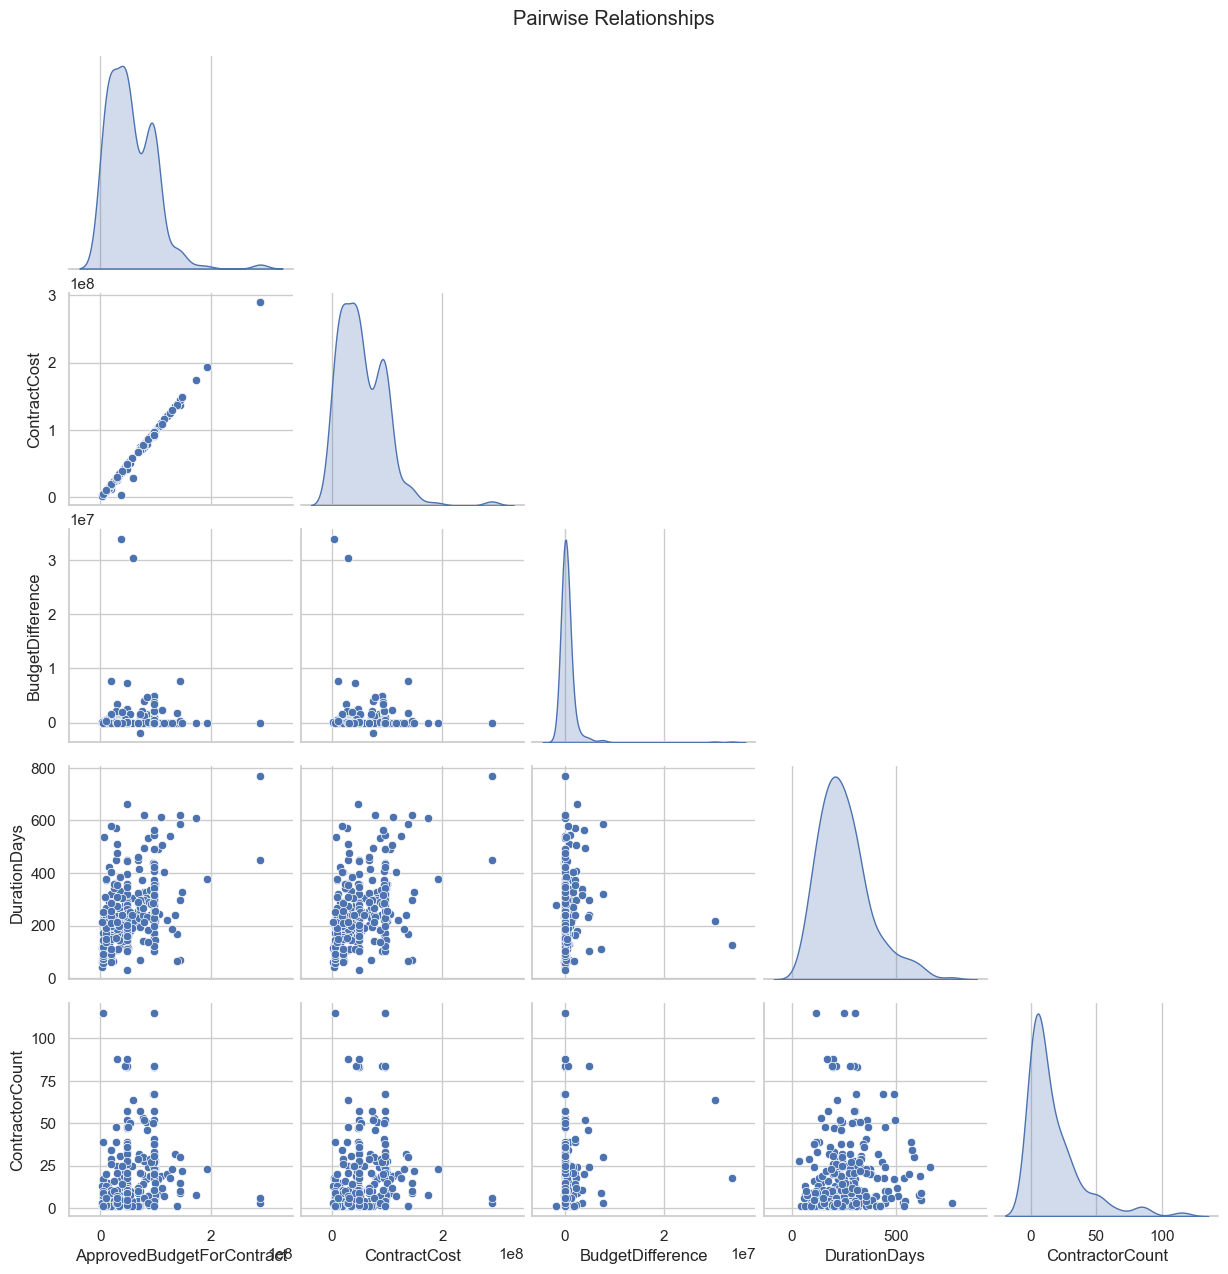

In [56]:
# Correlation and pairwise relationships for key numeric variables
corr_cols = ['ApprovedBudgetForContract', 'ContractCost', 'BudgetDifference', 'DurationDays', 'ContractorCount']

# Pairwise relationships (robust sampling after dropping NA)
available = df[corr_cols].dropna()
sample_size = min(300, len(available))
if sample_size > 0:
    sns.pairplot(available.sample(sample_size, random_state=42), corner=True, diag_kind='kde')
    plt.suptitle('Pairwise Relationships', y=1.02)
    plt.show()
else:
    print('Not enough complete rows for pairplot after dropping NA.')

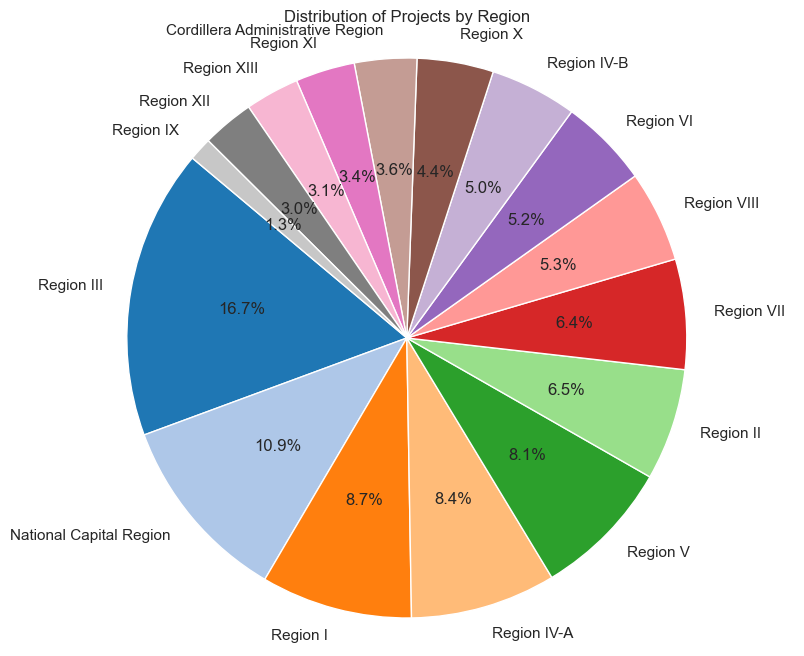

In [57]:
# Region distribution (pie chart)
region_counts = df['Region'].value_counts()

# Pie chart
plt.figure(figsize=(10,8))
plt.pie(region_counts,
        labels=region_counts.index,
        autopct='%1.1f%%',  # show percentage
        startangle=140,      # rotate start for better visualization
        colors=plt.cm.tab20.colors)  # use a colormap for colors

plt.title('Distribution of Projects by Region')
plt.axis('equal')  # make pie chart circular
plt.show()

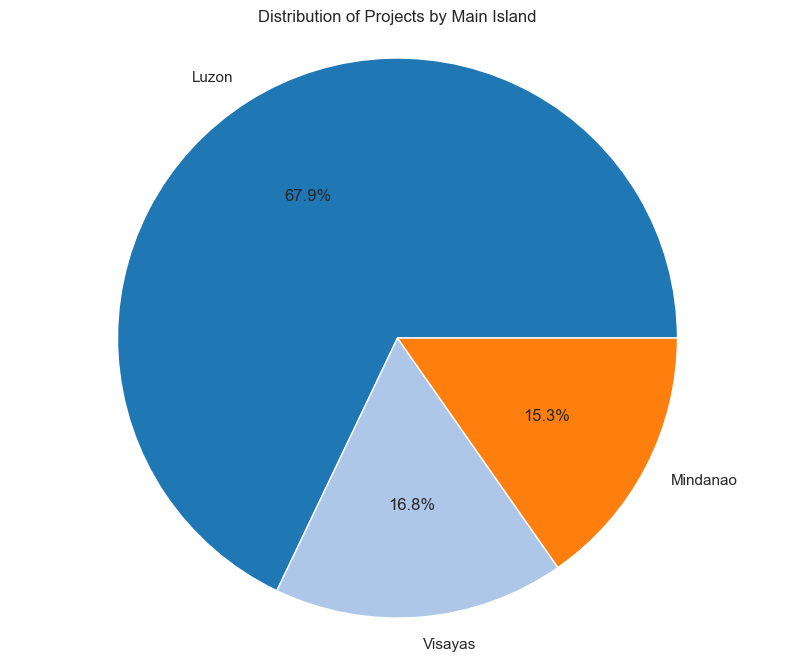

In [58]:
# Main Island distribution (pie chart)
island_groups = df['MainIsland'].value_counts()
plt.figure(figsize=(10,8))
plt.pie(island_groups,
        labels=island_groups.index, # rotate start for better visualization
        autopct='%1.1f%%',
        colors=plt.cm.tab20.colors)  # use a colormap for colors

plt.title('Distribution of Projects by Main Island')
plt.axis('equal')  # make pie chart circular
plt.show()

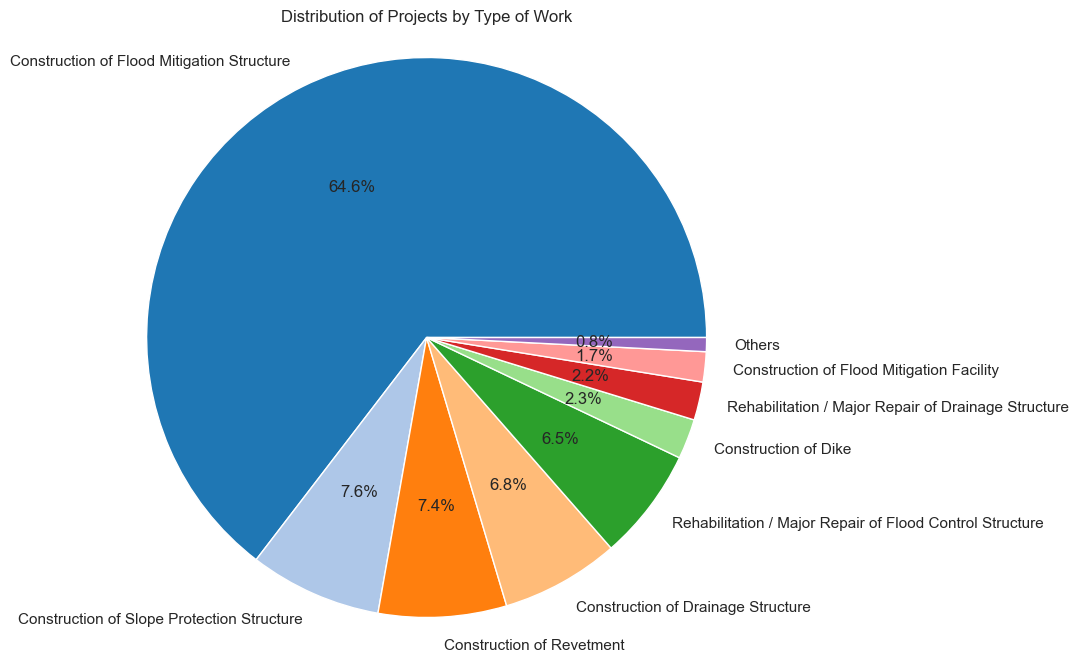

In [59]:
# Type of Work distribution (pie chart)
tow = df['TypeOfWork'].value_counts()
small_tow = tow[tow / tow.sum() >= 0.01].copy()
others_sum = tow[tow / tow.sum() < 0.01].sum()
if others_sum > 0:
    small_tow.loc['Others'] = others_sum
plt.figure(figsize=(10, 8))
plt.pie(small_tow,
        labels=small_tow.index,
        autopct='%1.1f%%',
        colors=plt.cm.tab20.colors)

plt.title('Distribution of Projects by Type of Work')
plt.axis('equal')
plt.show()


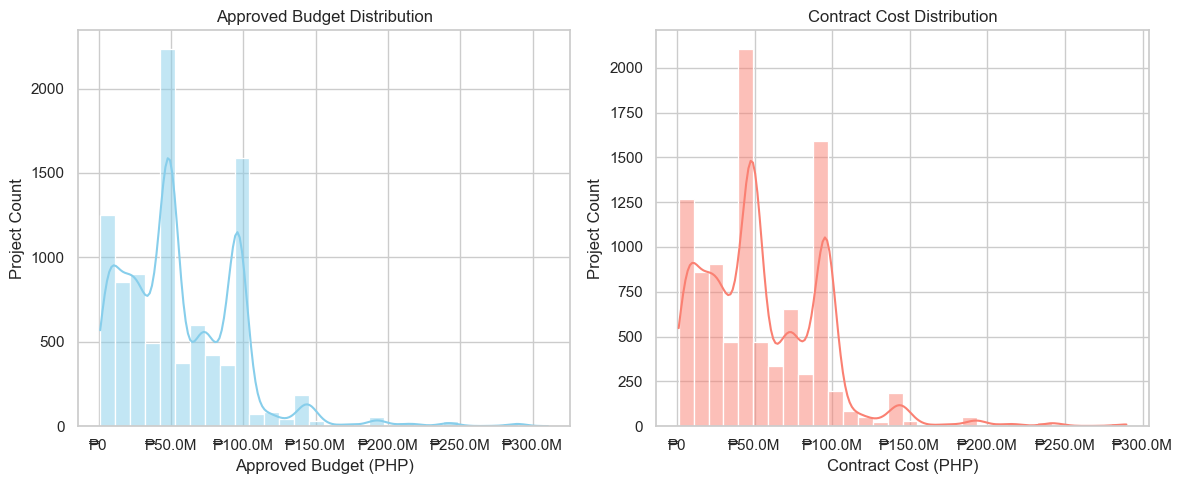

In [60]:
# Distributions with KDE
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.histplot(df['ApprovedBudgetForContract'].dropna(), bins=30, kde=True, color='skyblue')
plt.title('Approved Budget Distribution')
plt.xlabel('Approved Budget (PHP)'); plt.ylabel('Project Count')
plt.gca().xaxis.set_major_formatter(FuncFormatter(php_fmt))

plt.subplot(1,2,2)
sns.histplot(df['ContractCost'].dropna(), bins=30, kde=True, color='salmon')
plt.title('Contract Cost Distribution')
plt.xlabel('Contract Cost (PHP)'); plt.ylabel('Project Count')
plt.gca().xaxis.set_major_formatter(FuncFormatter(php_fmt))
plt.tight_layout()
plt.show()


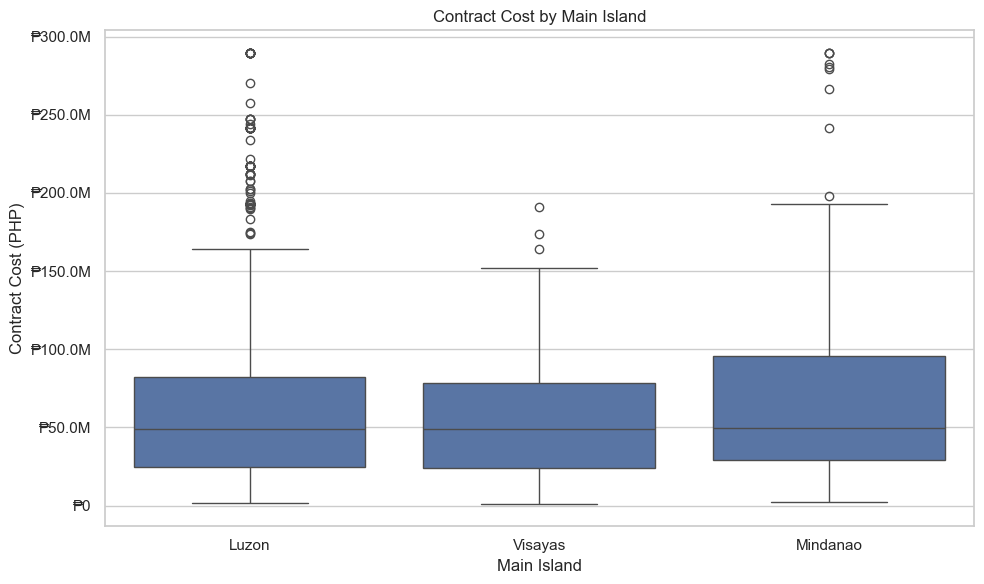

In [61]:
# Contract cost by Main Island boxplot
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='MainIsland', y='ContractCost')
plt.title('Contract Cost by Main Island')
plt.xlabel('Main Island'); plt.ylabel('Contract Cost (PHP)')
plt.gca().yaxis.set_major_formatter(FuncFormatter(php_fmt))
plt.tight_layout()
plt.show()


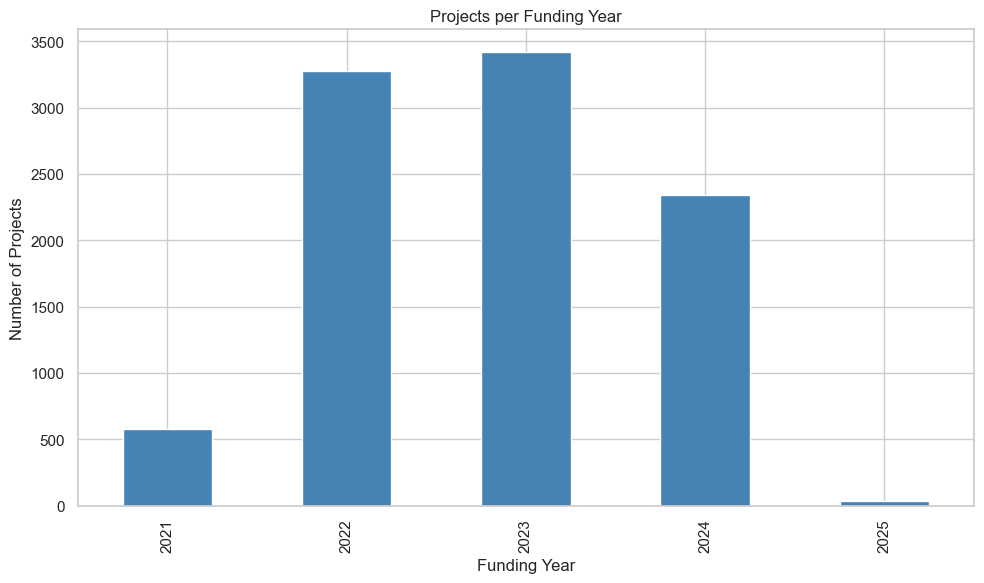

In [62]:
# Projects per Funding Year
plt.figure(figsize=(10,6))
df['FundingYear'].value_counts().sort_index().plot(kind='bar', color='steelblue')
plt.title('Projects per Funding Year')
plt.xlabel('Funding Year'); plt.ylabel('Number of Projects')
plt.tight_layout()
plt.show()


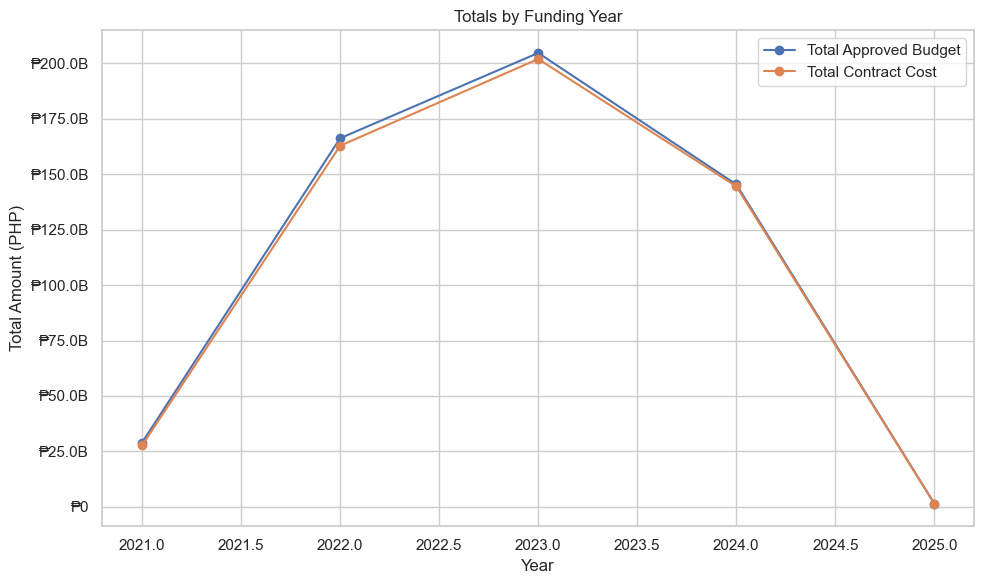

In [63]:
# Total Approved Budget vs Contract Cost by year line chart
plt.figure(figsize=(10,6))
year_totals = df.groupby('FundingYear')[['ApprovedBudgetForContract','ContractCost']].sum().sort_index()
plt.plot(year_totals.index, year_totals['ApprovedBudgetForContract'], marker='o', label='Total Approved Budget')
plt.plot(year_totals.index, year_totals['ContractCost'], marker='o', label='Total Contract Cost')
plt.legend(); plt.title('Totals by Funding Year'); plt.xlabel('Year'); plt.ylabel('Total Amount (PHP)')
plt.gca().yaxis.set_major_formatter(FuncFormatter(php_fmt))
plt.tight_layout()
plt.show()

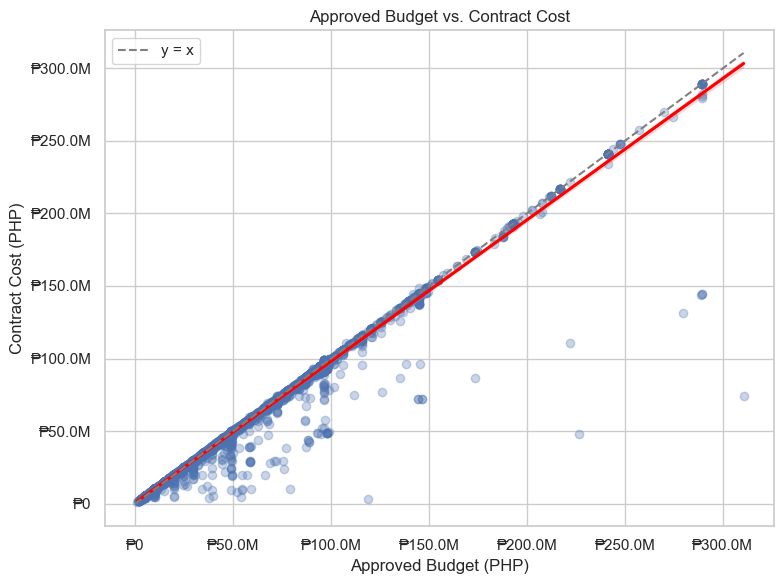

In [64]:
# Budget vs Cost with regression line and y=x reference
plt.figure(figsize=(8,6))
sns.regplot(data=df, x='ApprovedBudgetForContract', y='ContractCost', scatter_kws={'alpha':0.3}, line_kws={'color':'red'})
maxv = max(df['ApprovedBudgetForContract'].max(), df['ContractCost'].max())
plt.plot([0, maxv], [0, maxv], '--', color='gray', label='y = x')
plt.legend(); plt.title('Approved Budget vs. Contract Cost')
plt.xlabel('Approved Budget (PHP)'); plt.ylabel('Contract Cost (PHP)')
ax = plt.gca(); ax.xaxis.set_major_formatter(FuncFormatter(php_fmt)); ax.yaxis.set_major_formatter(FuncFormatter(php_fmt))
plt.tight_layout()
plt.show()


In [65]:
# Interactive map (Mapbox): projects colored by Type of Work
latitude = df['ProjectLatitude']
longitude = df['ProjectLongitude']
conCost = df['ContractCost'].fillna(0)

fig1 = px.scatter_map(df, lat=latitude, lon=longitude, hover_name='ProjectName',
                     map_style='satellite-streets', color='TypeOfWork',
                     height=800, width=1000,
                     color_discrete_sequence=px.colors.qualitative.Bold)
fig1.update_layout(
    title='Flood Control Projects in the Philippines by Type of Work',
    title_x=0.5,
    title_font_size=24,
    title_font_family='Courier New, monospace',
    title_font_color='red',
    title_xanchor='center',
    title_yanchor='top',
    legend_title_text='Type of Work'
)
fig1.show()


In [66]:
# Interactive map (Mapbox): projects colored by Contract Cost
fig = px.scatter_map(df, lat=latitude, lon=longitude, hover_name='ProjectName',
                     map_style='satellite-streets', color=conCost,
                     height=800, width=1000,
                     labels={'color': 'Contract Cost (PHP)'})
fig.update_coloraxes(colorbar_title_text='Contract Cost (PHP)', colorbar_tickprefix='₱', colorbar_tickformat='~s')
fig.show()

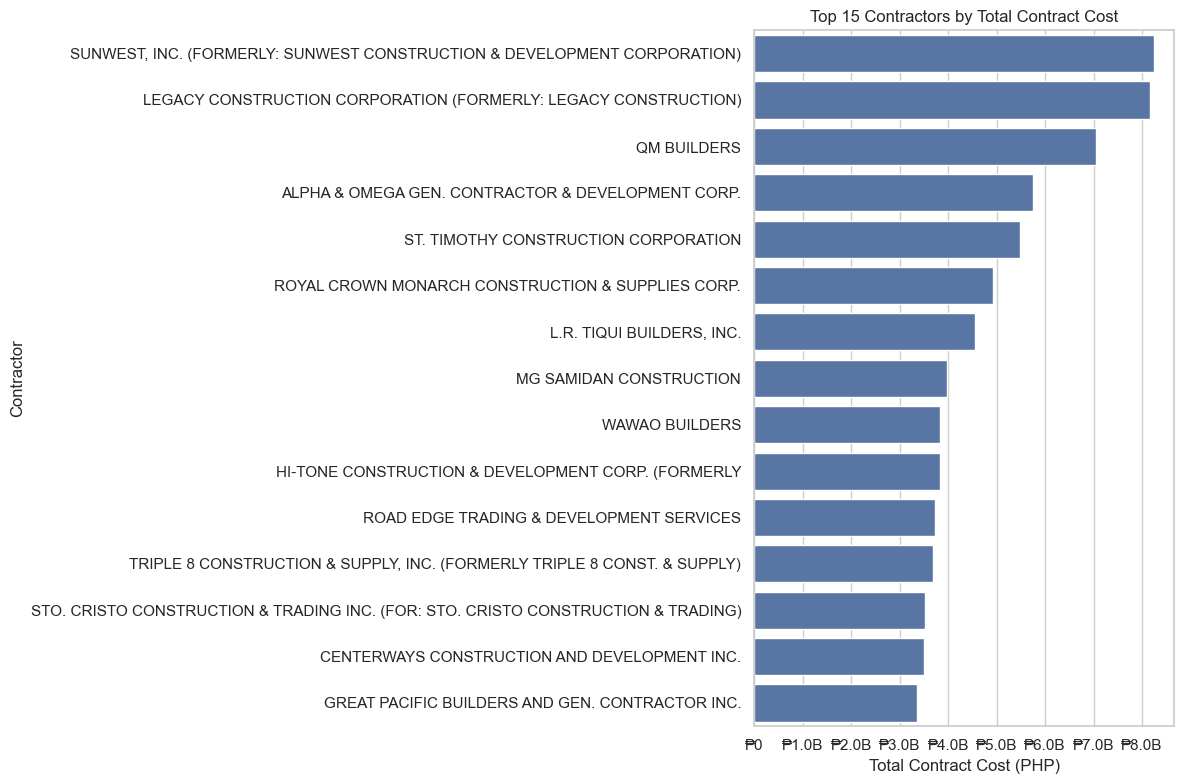

In [67]:
# Top Contractors by Total Contract Cost (bar chart)
# Compute total Contract Cost per contractor and plot top 15
top_n = 15
contractor_cost = (df.groupby('Contractor')['ContractCost']
                     .sum()
                     .sort_values(ascending=False)
                     .head(top_n))
plt.figure(figsize=(12,8))
sns.barplot(x=contractor_cost.values, y=contractor_cost.index, orient='h')
plt.title(f'Top {top_n} Contractors by Total Contract Cost')
plt.xlabel('Total Contract Cost (PHP)'); plt.ylabel('Contractor')
plt.gca().xaxis.set_major_formatter(FuncFormatter(php_fmt))
plt.tight_layout()
plt.show()


In [68]:
df.to_csv("cleaned_flood_data.csv", index=False)


In [69]:
import folium as fm
interactiveMap = fm.Map(location=(45.5236, -122.6750), zoom_start=12)
interactiveMap